<a href="https://colab.research.google.com/github/Saijain/SkinDisease-ImageDiagnosis-CNNNeuralNetwork/blob/main/SkinDisease_ImageDiagnosis_CNNNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skin Disease Classification using ResNet 50 CNN model

*INSTALLING*

In [ ]:
!pip install tensorflow keras split-folders opencv-python kagglehub

IMPORT ALL LIBRAIRES

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models

IMPORT DATASET

In [ ]:
import kagglehub
path = kagglehub.dataset_download("ismailpromus/skin-diseases-image-dataset")

Using Colab cache for faster access to the 'skin-diseases-image-dataset' dataset.


PREPROCCESING IMAGES AND DATA

In [ ]:
input_folder = path + '/IMG_CLASSES'
output_folder = '/content/ImageRecognition'

split_ratio = (0.8, 0.1, 0.1)

splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=500,
    ratio=split_ratio,
    group_prefix=None
)

Copying files: 27153 files [01:04, 421.31 files/s] 


In [ ]:
#define parameters
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
#data aug for test data
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
#data aug for val data
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [ ]:
import os

train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 21719 images belonging to 10 classes.
Found 2723 images belonging to 10 classes.
Found 2711 images belonging to 10 classes.


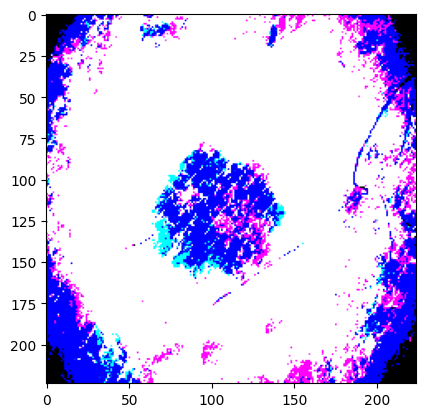

In [ ]:
import random
import matplotlib.pyplot as plt

#to see image after being augmented and preproccessed
images, labels = next(valid_data)

idx = random.randint(0, images.shape[0] - 1)

plt.imshow(images[idx])
plt.show()
#BELOW IS SAMPLE IMAGE AFTER AUGMENTED FOR MODEL

In [ ]:
from keras.applications.resnet import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
num_classes = train_data.num_classes # This will be 10 based on flow_from_directory output

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') # Ensure this is set to 10
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

TRAINING

In [ ]:
model.fit(train_data, epochs=15, validation_data=valid_data)

NameError: name 'model' is not defined

In [ ]:
#evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100: .2f}%')

86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 317ms/step - accuracy: 0.6949 - loss: 0.7872
Test Accuracy:  69.92%


In [ ]:
class_names = {0: 'Eczema', 1: 'Warts Molluscum and other Viral Infections', 2: 'Melanoma', 3: 'Atopic Dermatitis', 4: 'Basal Cell Carcinoma (BCC)', 5: 'Melanocytic Nevi (NV)', 6: 'Benign Keratosis-like Lesions (BKL)', 7: 'Psoriasis pictures Lichen Planus and related diseases', 8: 'Seborrheic Keratoses and other Benign Tumors', 9: 'Tinea Ringworm Candidiasis and other Fungal Infections'}

In [ ]:
def predict_img(image,model):
  test_img=cv2.imread(image)
  test_img=cv2.resize(test_img,(224,224))
  test_img=np.expand_dims(test_img, axis=0)
  result=model.predict(test_img)
  r=np.argmax(result)
  print(class_names[r])

In [ ]:
model.save('DermAI.keras')

In [ ]:
from google.colab import files
files.download("DermAI.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>